### Importing the Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

In [17]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv("gld_price_data.csv")

In [18]:
# Print the first five rows of the Data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
# Number of Rows and Columns
gold_data.shape

(2290, 6)

In [20]:
# Getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
# Checking for the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
# Getting the Staticstival measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation
1)Positive
2)Negative

In [23]:
correlation = gold_data.select_dtypes(include='number').corr()

<Axes: >

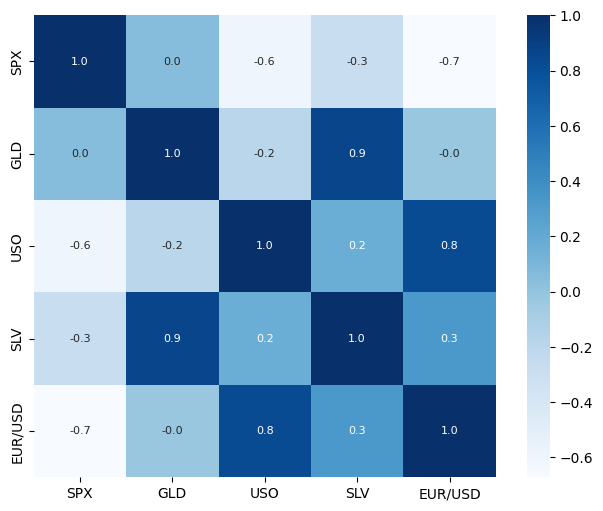

In [24]:
# Constructing a heat map to understand the correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [25]:
# Correlation Vales of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_1504\610679416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

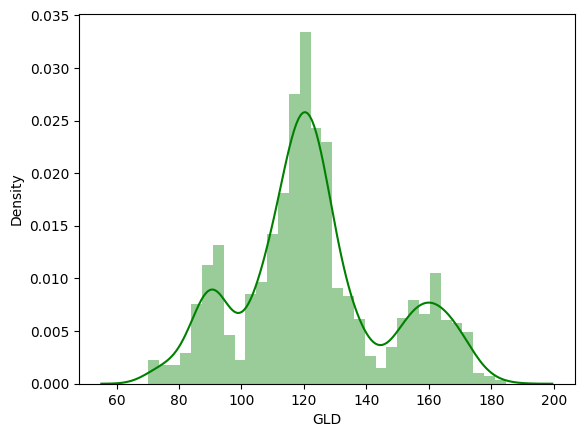

In [26]:
# Checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

### Splitting the Features and Target

In [27]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [28]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [29]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting into Training and Test Data

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

### Model Training : Random Forest Regressor

In [31]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
# Training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

### Model Evaluation

In [33]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[168.59639927  81.73229998 116.12410015 127.55320065 120.75930081
 154.64409879 150.21069864 126.09280036 117.56329857 126.03370052
 116.98330076 171.33500088 141.27049884 167.74689822 114.99159992
 117.54600052 139.59200209 169.69170121 159.4984029  160.83379905
 155.17490061 125.06289994 176.01599939 157.02110311 125.24870024
  93.8572997   76.99890058 120.78440013 119.07079939 167.44249966
  88.1936007  125.33830017  90.98500041 117.62680022 121.08829905
 136.36270147 115.41580087 114.65540045 146.7886993  107.15580096
 104.75070254  87.24899806 126.41030063 118.23449977 153.79169863
 119.56659922 108.29909988 108.11009828  93.25310016 127.24299733
  75.18980022 113.65749925 121.51059996 111.28589892 119.00009906
 120.52849965 159.0877993  168.31600038 147.06189663  85.83339853
  94.22690028  86.8021987   90.5634002  118.91920083 126.44370046
 127.56940003 170.38040059 122.32889939 117.32419901  98.49750031
 168.26700051 142.86379785 131.85740342 121.12930228 121.72159944
 119.61820

In [35]:
# R Squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.9891425661675912


### Compare the Acutal Values and Predicted Values in a Plot

In [36]:
y_test = list(y_test)

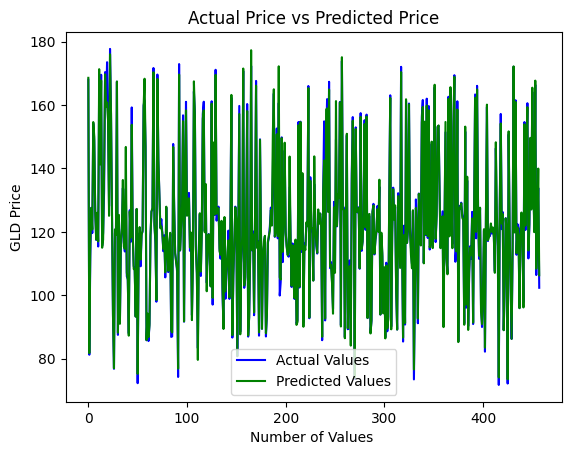

In [37]:
plt.plot(y_test,color='blue',label = 'Actual Values')
plt.plot(test_data_prediction,color='green',label = 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values ')
plt.ylabel('GLD Price')
plt.legend()
plt.show()